In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


In [2]:
#Positionwise carbon
#df=pd.read_excel("aa_properties.xlsx")
# H-wise Carbon 
df=pd.read_excel("aa_properties2.xlsx")
# identity
#df=pd.read_excel("aa_properties3.xlsx")
df

aa  CA-Gly  Pro-MC  Carboxyl  Amide  His  Trp  Phe-Tyr  OH-Tyr  CH2  CH  \
0   A       0       0         0      0    0    0        0       0    0   0   
1   C       0       0         0      0    0    0        0       0    1   0   
2   D       0       0         3      0    0    0        0       0    1   0   
3   E       0       0         3      0    0    0        0       0    2   0   
4   F       0       0         0      0    0    0        6       0    1   0   
5   G       1       0         0      0    0    0        0       0    0   0   
6   H       0       0         0      0    5    0        0       0    1   0   
7   I       0       0         0      0    0    0        0       0    1   1   
8   K       0       0         0      0    0    0        0       0    4   0   
9   L       0       0         0      0    0    0        0       0    1   1   
10  M       0       0         0      0    0    0        0       0    2   0   
11  N       0       0         0      3    0    0        0       0    1   0   
12  P       0       2         0      0    0    0        0       0    3   0   
13  Q       0       0         0      3    0    0        0       0    2   0   
14  R       0       0         0      0    0    0        0       0    3   0   
15  S       0       0         0      0    0    0        0       0    1   0   
16  T       0       0         0      0    0    0        0       0    0   1   
17  Y       0       0         0      0    0    0        6       1    1   0   
18  V       0       0         0      0    0    0        0       0    0   1   
19  W       0       0         0      0    0    9        0       0    1   0   

    CH3  OH  SH  S  NH3  Arg  MC  
0     1   0   0  0    0    0   4  
1     0   0   1  0    0    0   4  
2     0   0   0  0    0    0   4  
3     0   0   0  0    0    0   4  
4     0   0   0  0    0    0   4  
5     0   0   0  0    0    0   3  
6     0   0   0  0    0    0   4  
7     2   0   0  0    0    0   4  
8     0   0   0  0    1    0   4  
9     2   0   0  0    0    0   4  
10    1   0   0  1    0    0   4  
11    0   0   0  0    0    0   4  
12    0   0   0  0    0    0   2  
13    0   0   0  0    0    0   4  
14    0   0   0  0    0    4   4  
15    0   1   0  0    0    0   4  
16    1   1   0  0    0    0   4  
17    0   0   0  0    0    0   4  
18    2   0   0  0    0    0   4  
19    0   0   0  0    0    0   4

In [3]:
def peptrans(peptide):
    rows=[]
    for l in peptide:
        rows.append(df[df.aa==l])
    return pd.concat(rows).sum()


In [4]:
pf=pd.read_excel("Clean_results_2_2019.xlsx")

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
transpf=pf['Peptide'].apply(peptrans)

In [6]:
mergepf = pd.concat([pf, transpf], axis=1, sort=False)

In [7]:
mergepf["Prot_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Peptide"]
mergepf["Prot_res_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Residue number"].map(str)+"_"+ mergepf["Peptide"]
mergepf=mergepf.set_index('Prot_res_pep')
mergepf=mergepf.rename(columns={u'Survivin, 1 µg/ml': u'Fluorescence'})

In [38]:
%matplotlib

predict=clf.predict(X)
def tollog(number):
    if number==0:
        return 0
    return np.log(number)
mergepf=mergepf.rename(columns={u'Survivin, 1 µg/ml': u'Fluorescence'})
row_colors= mergepf[u'Fluorescence'].map(tollog)/np.max(mergepf[u'Fluorescence'].map(tollog))
row_colors= row_colors.map(str)
row_colors= pd.DataFrame(row_colors)
stuff={'Prediction': np.where(predict==0,'k','c')}

stuff=np.where(predict==0,'k','c')
row_colors['Prediction']=stuff

g=sns.clustermap(mergepf[[u'CA-Gly', u'Pro-MC', 
         u'Carboxyl', u'Amide',
         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']],z_score=1, method='ward', row_colors=row_colors, yticklabels=1, col_cluster=True)


plt.subplots_adjust(top=0.895,
        bottom=0.11,
        left=0.1,
        right=0.735,
        hspace=0.2,
        wspace=0.2)


Using matplotlib backend: Qt5Agg


/home/gergely/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [11]:
%matplotlib qt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

f,ax=plt.subplots(1)
ax.hist(mergepf[(mergepf[u'Survivin, 1 µg/ml']<70000)][u'Survivin, 1 µg/ml'],density=True, histtype='step',
                           cumulative=True, bins=1000)
ax.set_xlabel('Fluorescence intensity (a.u.)')
ax.set_ylabel('Cumulative fraction')
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax, [0.4,0.2,0.5,0.5])
ax2.set_axes_locator(ip)

ax2.hist(mergepf[(mergepf[u'Survivin, 1 µg/ml']<70000)][u'Survivin, 1 µg/ml'],density=True, histtype='step',
                           cumulative=True, bins=1000)
ax2.set_xlim([0,5000])
ax2.set_xlabel('Fluorescence intensity (a.u.)')
ax2.set_ylabel('Cumulative fraction')

<ipython-input-11-c423ce7ad724>:2: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


Text(0, 0.5, 'Cumulative fraction')

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

clf = MLPClassifier(hidden_layer_sizes=(2,), random_state=1, max_iter=10000)


X = np.array(mergepf[[u'CA-Gly', u'Pro-MC', 
         u'Carboxyl', u'Amide',
         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])[1::3]
         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

Y=np.array(mergepf[u'Fluorescence']>0)
#Y=np.array(mergepf[u'Fluorescence']>0)[1::3]

Y=np.array(mergepf[u'Fluorescence']>0)
X = np.array(mergepf[[u'CA-Gly', u'Pro-MC', 
         u'Carboxyl', u'Amide',
         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X = np.array(mergepf[(mergepf[1::3][u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#X = np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


X = StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, shuffle=True)

#    X, np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
#    X, np.array(mergepf[1::3][(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
predict

array([ True,  True, False, ...,  True, False,  True])

Confusion matrix:
[[1507  210]
 [ 299  628]]


/home/gergely/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


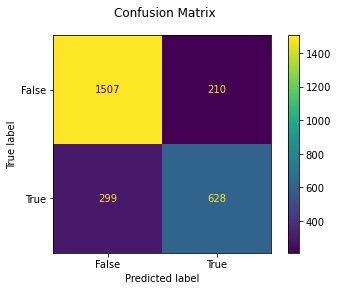

In [37]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [38]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predict)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000, random_state=1):
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1717
        True       0.75      0.68      0.71       927

    accuracy                           0.81      2644
   macro avg       0.79      0.78      0.78      2644
weighted avg       0.80      0.81      0.81      2644


